# CUDA MergeSort Weak Scaling Analysis

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

What are the files we are analyzing?

In [2]:
all_files = glob("*.cali")
print(all_files)

['v1048576-input1-v1024.cali', 'v65536-input0-v256.cali', 'v1048576-input1-v64.cali', 'v268435456-input3-v256.cali', 'v16777216-input2-v1.cali', 'v4194304-input2-v512.cali', 'v16777216-input0-v1024.cali', 'v4194304-input2-v1024.cali', 'v67108864-input0-v1.cali', 'v67108864-input3-v64.cali', 'v268435456-input0-v64.cali', 'v262144-input2-v256.cali', 'v16777216-input1-v256.cali', 'v4194304-input2-v128.cali', 'v16777216-input3-v64.cali', 'v65536-input3-v64.cali', 'v4194304-input2-v1.cali', 'v268435456-input0-v256.cali', 'v16777216-input3-v128.cali', 'v1048576-input1-v128.cali', 'v1048576-input2-v64.cali', 'v262144-input3-v128.cali', 'v65536-input2-v256.cali', 'v65536-input2-v64.cali', 'v4194304-input0-v256.cali', 'v65536-input3-v1024.cali', 'v268435456-input3-v128.cali', 'v4194304-input1-v256.cali', 'v262144-input1-v512.cali', 'v1048576-input0-v1024.cali', 'v65536-input3-v512.cali', 'v262144-input3-v512.cali', 'v1048576-input0-v128.cali', 'v65536-input2-v1.cali', 'v16777216-input1-v1024.ca

# Read n files (n = 33)

In [3]:
tk = th.Thicket.from_caliperreader(all_files)

What files?

In [4]:
tk.profile_mapping

OrderedDict([(8671516, 'v262144-input3-v256.cali'),
             (26362809, 'v1048576-input3-v1024.cali'),
             (73444406, 'v1048576-input0-v512.cali'),
             (77196017, 'v262144-input2-v64.cali'),
             (80591504, 'v1048576-input1-v64.cali'),
             (131023852, 'v268435456-input0-v64.cali'),
             (146722057, 'v16777216-input1-v1024.cali'),
             (155246915, 'v16777216-input2-v1024.cali'),
             (301897107, 'v262144-input1-v256.cali'),
             (306754799, 'v65536-input1-v1.cali'),
             (310137372, 'v262144-input1-v1.cali'),
             (326490346, 'v65536-input2-v512.cali'),
             (358204925, 'v65536-input0-v64.cali'),
             (365143094, 'v262144-input2-v256.cali'),
             (370889339, 'v268435456-input2-v1.cali'),
             (398846564, 'v1048576-input3-v256.cali'),
             (415572344, 'v65536-input0-v1024.cali'),
             (423069205, 'v1048576-input2-v512.cali'),
             (435875942, 'v41

Call tree

In [5]:
tk.statsframe.dataframe["test"] = -1
print(tk.tree(metric_column="test"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

-1.000 main
├─ -1.000 comm
│  └─ -1.000 comm_large
├─ -1.000 comp
│  └─ -1.000 comp_large
├─ -1.000 correctness_check
└─ -1.000 data_init

Legend (Metric: test Min: -1.00 Max: -1.00)
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



Performance data

In [6]:
tk.dataframe

nid  \
node                                              profile           
{'name': 'main', 'type': 'function'}              8671516       1   
                                                  26362809      1   
                                                  73444406      1   
                                                  77196017      1   
                                                  80591504      1   
                                                  131023852     1   
                                                  146722057     1   
                                                  155246915     1   
                                                  301897107     1   
                                                  306754799     1   
                                                  310137372     1   
                                                  326490346     1   
                                                  358204925     1   
                                                  365143094     1   
                                                  370889339     1   
                                                  398846564     1   
                                                  415572344     1   
                                                  423069205     1   
                                                  435875942     1   
                                                  442802861     1   
                                                  448190670     1   
                                                  453632840     1   
                                                  456941575     1   
                                                  465991297     1   
                                                  467873917     1   
                                                  472203331     1   
                                                  484547645     1   
                                                  487486139     1   
                                                  657413371     1   
                                                  667914561     1   
                                                  668191086     1   
                                                  697294436     1   
                                                  722477220     1   
                                                  738900608     1   
                                                  780296901     1   
                                                  797415673     1   
                                                  823209358     1   
                                                  830563953     1   
                                                  839676448     1   
                                                  857837294     1   
                                                  862949708     1   
                                                  949727534     1   
                                                  963350271     1   
                                                  963550566     1   
                                                  972329100     1   
                                                  993285274     1   
                                                  1038057598    1   
                                                  1053632151    1   
                                                  1088370227    1   
                                                  1165650726    1   
                                                  1190377945    1   
                                                  1238348883    1   
                                                  1242386595    1   
                                                  1263138539    1   
                                                  1295541022    1   
                                                  1390441017    1   
                                                  1413141150

In [7]:
tk.dataframe = tk.dataframe.drop(["nid", "spot.channel", "Min time/rank", "Max time/rank", "Total time", "Min GPU time/rank", "Max GPU time/rank", "Total GPU time"], axis=1)

In [8]:
tk.dataframe

Avg time/rank  \
node                                              profile                     
{'name': 'main', 'type': 'function'}              8671516          0.497115   
                                                  26362809         0.925113   
                                                  73444406         0.763934   
                                                  77196017         0.439615   
                                                  80591504         0.909412   
                                                  131023852      131.262319   
                                                  146722057       10.399757   
                                                  155246915        7.808683   
                                                  301897107        0.492523   
                                                  306754799        0.372899   
                                                  310137372        0.491468   
                                                  326490346        0.379200   
                                                  358204925        0.352285   
                                                  365143094        0.454716   
                                                  370889339      119.735836   
                                                  398846564        0.873240   
                                                  415572344        0.367959   
                                                  423069205        0.775989   
                                                  435875942        2.618216   
                                                  442802861       33.948164   
                                                  448190670        0.365628   
                                                  453632840       10.602941   
                                                  456941575        7.469947   
                                                  465991297        0.446398   
                                                  467873917        7.409880   
                                                  472203331      165.544839   
                                                  484547645        7.650283   
                                                  487486139        0.907293   
                                                  657413371        0.488727   
                                                  667914561        7.714844   
                                                  668191086        7.518035   
                                                  697294436        7.545246   
                                                  722477220      123.239624   
                                                  738900608        0.827878   
                                                  780296901        0.915040   
                                                  797415673       30.563589   
                                                  823209358        0.516136   
                                                  830563953        0.351508   
                                                  839676448        2.089881   
                                                  857837294        2.134558   
                                                  862949708       30.469848   
                                                  949727534        0.461257   
                                                  963350271        0.958314   
                                                  963550566       40.911966   
                                                  972329100       10.285038   
                                                  993285274        2.090415   
                                                  1038057598     132.237891   
                                                  1053632151      40.293705   
                                                  1088370227     124.518428   
                                 

Metadata

In [9]:
tk.metadata

cali.caliper.version  \
profile                           
8671516              2.11.0-dev   
26362809             2.11.0-dev   
73444406             2.11.0-dev   
77196017             2.11.0-dev   
80591504             2.11.0-dev   
131023852            2.11.0-dev   
146722057            2.11.0-dev   
155246915            2.11.0-dev   
301897107            2.11.0-dev   
306754799            2.11.0-dev   
310137372            2.11.0-dev   
326490346            2.11.0-dev   
358204925            2.11.0-dev   
365143094            2.11.0-dev   
370889339            2.11.0-dev   
398846564            2.11.0-dev   
415572344            2.11.0-dev   
423069205            2.11.0-dev   
435875942            2.11.0-dev   
442802861            2.11.0-dev   
448190670            2.11.0-dev   
453632840            2.11.0-dev   
456941575            2.11.0-dev   
465991297            2.11.0-dev   
467873917            2.11.0-dev   
472203331            2.11.0-dev   
484547645            2.11.0-dev   
487486139            2.11.0-dev   
657413371            2.11.0-dev   
667914561            2.11.0-dev   
668191086            2.11.0-dev   
697294436            2.11.0-dev   
722477220            2.11.0-dev   
738900608            2.11.0-dev   
780296901            2.11.0-dev   
797415673            2.11.0-dev   
823209358            2.11.0-dev   
830563953            2.11.0-dev   
839676448            2.11.0-dev   
857837294            2.11.0-dev   
862949708            2.11.0-dev   
949727534            2.11.0-dev   
963350271            2.11.0-dev   
963550566            2.11.0-dev   
972329100            2.11.0-dev   
993285274            2.11.0-dev   
1038057598           2.11.0-dev   
1053632151           2.11.0-dev   
1088370227           2.11.0-dev   
1165650726           2.11.0-dev   
1190377945           2.11.0-dev   
1238348883           2.11.0-dev   
1242386595           2.11.0-dev   
1263138539           2.11.0-dev   
1295541022           2.11.0-dev   
1390441017           2.11.0-dev   
1413141150           2.11.0-dev   
1415535432           2.11.0-dev   
1420618808           2.11.0-dev   
1421968418           2.11.0-dev   
1481614407           2.11.0-dev   
1527575431           2.11.0-dev   
1546125291           2.11.0-dev   
1552414478           2.11.0-dev   
1569207982           2.11.0-dev   
1574624564           2.11.0-dev   
1602223338           2.11.0-dev   
1611669201           2.11.0-dev   
1620332689           2.11.0-dev   
1642540211           2.11.0-dev   
1688915385           2.11.0-dev   
1689955739           2.11.0-dev   
1707478289           2.11.0-dev   
1744186313           2.11.0-dev   
1773178986           2.11.0-dev   
1777043339           2.11.0-dev   
1834261356           2.11.0-dev   
1842096505           2.11.0-dev   
1863550098           2.11.0-dev   
1881591841           2.11.0-dev   
1882112086           2.11.0-dev   
1891848029           2.11.0-dev   
1932684689           2.11.0-dev   
1987519653           2.11.0-dev   
2042348715           2.11.0-dev   
2060167686           2.11.0-dev   
2184057449           2.11.0-dev   
2193314312           2.11.0-dev   
2195364205           2.11.0-dev   
2247057245           2.11.0-dev   
2249586671           2.11.0-dev   
2259006539           2.11.0-dev   
2266753446           2.11.0-dev   
2292247782           2.11.0-dev   
2294539867           2.11.0-dev   
2339933499           2.11.0-dev   
2339960462           2.11.0-dev   
2399057036           2.11.0-dev   
2462660253           2.11.0-dev   
2473146400           2.11.0-dev   
2513014309           2.11.0-dev   
2522314997           2.11.0-dev   
2532706992           2.11.0-dev   
2540308571           2.11.0-dev   
2570956190           2.11.0-dev   
2607366772           2.11.0-dev   
2611408874           2.11.0-dev   
2617733630           2.11.0-dev   
2638625378           2.11.0-dev   
2694669419           2.11.0-dev   
2722914687           2.11.0-dev   
2749333693           2.11.0-dev   
2798709157           

# Goal

programmatically analyze the data by graphing it

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [10]:
gb = tk.groupby(["num_threads", "InputType"])

24  thickets created...
{(1, '1%perturbed'): <thicket.thicket.Thicket object at 0x2b2d92552f40>, (1, 'Random'): <thicket.thicket.Thicket object at 0x2b2d9267f880>, (1, 'ReverseSorted'): <thicket.thicket.Thicket object at 0x2b2d926160a0>, (1, 'Sorted'): <thicket.thicket.Thicket object at 0x2b2d927b8d60>, (64, '1%perturbed'): <thicket.thicket.Thicket object at 0x2b2d9262b520>, (64, 'Random'): <thicket.thicket.Thicket object at 0x2b2d926d8af0>, (64, 'ReverseSorted'): <thicket.thicket.Thicket object at 0x2b2d927a2ac0>, (64, 'Sorted'): <thicket.thicket.Thicket object at 0x2b2d92664eb0>, (128, '1%perturbed'): <thicket.thicket.Thicket object at 0x2b2d9261c1f0>, (128, 'Random'): <thicket.thicket.Thicket object at 0x2b2d92601850>, (128, 'ReverseSorted'): <thicket.thicket.Thicket object at 0x2b2d926495e0>, (128, 'Sorted'): <thicket.thicket.Thicket object at 0x2b2d92612850>, (256, '1%perturbed'): <thicket.thicket.Thicket object at 0x2b2d926268e0>, (256, 'Random'): <thicket.thicket.Thicket object 

Compose these 3 groups column-wise to get a holistic view of the data

In [11]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="InputSize"
)

In [12]:
ctk.dataframe

(1, 1%perturbed)  \
                                                               Avg time/rank   
node                                              InputSize                    
{'name': 'main', 'type': 'function'}              65536             0.378157   
                                                  262144            0.478497   
                                                  1048576           0.826881   
                                                  4194304           2.345681   
                                                  16777216          8.732770   
                                                  67108864         33.747818   
                                                  268435456       133.078179   
{'name': 'comm', 'type': 'function'}              65536             0.000158   
                                                  262144            0.000342   
                                                  1048576           0.001029   
                                                  4194304           0.003664   
                                                  16777216          0.014355   
                                                  67108864          0.057240   
                                                  268435456         0.227752   
{'name': 'comm_large', 'type': 'function'}        65536             0.000107   
                                                  262144            0.000281   
                                                  1048576           0.000964   
                                                  4194304           0.003605   
                                                  16777216          0.014291   
                                                  67108864          0.057169   
                                                  268435456         0.227677   
{'name': 'comp', 'type': 'function'}              65536             0.000152   
                                                  262144            0.000194   
                                                  1048576           0.000212   
                                                  4194304           0.000190   
                                                  16777216          0.000230   
                                                  67108864          0.000291   
                                                  268435456         0.000255   
{'name': 'comp_large', 'type': 'function'}        65536             0.000138   
                                                  262144            0.000177   
                                                  1048576           0.000194   
                                                  4194304           0.000174   
                                                  16777216          0.000211   
                                                  67108864          0.000272   
                                                  268435456         0.000236   
{'name': 'correctness_check', 'type': 'function'} 65536             0.008599   
                                                  262144            0.036735   
                                                  1048576           0.158464   
                                                  4194304           0.682298   
                                                  16777216          2.916234   
                                                  67108864         12.428801   
                                                  268435456        52.864853   
{'name': 'data_init', 'type': 'function'}         65536             0.003064   
                                                  262144            0.012200   
                                                  1048576           0.047914   
                                                  4194304           0.190844   
                                                  16777216          0.778780   
                                                  67108864  

In [13]:
ctk.metadata

(1, 1%perturbed)  \
          cali.caliper.version   
InputSize                        
65536               2.11.0-dev   
262144              2.11.0-dev   
1048576             2.11.0-dev   
4194304             2.11.0-dev   
16777216            2.11.0-dev   
67108864            2.11.0-dev   
268435456           2.11.0-dev   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304    min#inclusive#sum#time.duration,max#inclusive#...   
16777216   min#inclusive#sum#time.duration,max#inclusive#...   
67108864   min#inclusive#sum#time.duration,max#inclusive#...   
268435456  min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                               2   
262144                                              2   
1048576                                             2   
4194304                                             2   
16777216                                            2   
67108864                                            2   
268435456                                           2   

                                                                \
                      spot.options  spot.channels cali.channel   
InputSize                                                        
65536      cuda.gputime,node.order  regionprofile         spot   
262144     cuda.gputime,node.order  regionprofile         spot   
1048576    cuda.gputime,node.order  regionprofile         spot   
4194304    cuda.gputime,node.order  regionprofile         spot   
16777216   cuda.gputime,node.order  regionprofile         spot   
67108864   cuda.gputime,node.order  regionprofile         spot   
268435456  cuda.gputime,node.order  regionprofile         spot   

                                                                        \
          spot:cuda.gputime spot:node.order                spot:output   
InputSize                                                                
65536                  true            true      v65536-input3-v1.cali   
262144                 true            true     v262144-input3-v1.cali   
1048576                true            true    v1048576-input3-v1.cali   
4194304                true            true    v4194304-input3-v1.cali   
16777216               true            true   v16777216-input3-v1.cali   
67108864               true            true   v67108864-input3-v1.cali   
268435456              true            true  v268435456-input3-v1.cali   

                                                                          \
           launchdate                                          libraries   
InputSize                                                                  
65536      1702144697  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1702144977  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1702145052  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304    1702145114  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16777216   1702145197  [/scratch/group/csce435-f23/Caliper/caliper/li...   
67108864   1702145268  [/scratch/group/csce435-f23/Caliper/caliper/li...   
268435456  1702145362  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                             \
                                cmdline cluster  Algorithm ProgrammingModel   
InputSize                                                                     
65536          [./bitonic, 65536, 3, 1]       g  MergeSort   

Perform pandas operations to get the table in a desirable format for plotting

In [14]:
# Rename index to remove tuple
ctk.dataframe = ctk.dataframe.reset_index().rename({("name", ""): "name", ("InputSize", ""): "InputSize"}).set_index(["name", "InputSize"])

In [15]:
# Drop "time" label as it is redundant
# ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)
ctk.dataframe = ctk.dataframe.drop(["node"], axis=1)

<ipython-input-15-c21ea0be011b>:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ctk.dataframe = ctk.dataframe.drop(["node"], axis=1)


In [16]:
ctk.dataframe

(1, 1%perturbed)                     (1, Random)  \
                               Avg time/rank Avg GPU time/rank Avg time/rank   
name              InputSize                                                    
main              65536             0.378157          0.027361      0.372899   
                  262144            0.478497          0.092686      0.491468   
                  1048576           0.826881          0.293994      0.825706   
                  4194304           2.345681          1.133077      2.294955   
                  16777216          8.732770          4.700564      8.446711   
                  67108864         33.747818         17.817201     33.503196   
                  268435456       133.078179         67.250080    134.906350   
comm              65536             0.000158          0.000025      0.000175   
                  262144            0.000342          0.000088      0.000340   
                  1048576           0.001029          0.000759      0.001025   
                  4194304           0.003664          0.003396      0.003642   
                  16777216          0.014355          0.014071      0.014387   
                  67108864          0.057240          0.056908      0.057946   
                  268435456         0.227752          0.227459      0.227766   
comm_large        65536             0.000107          0.000025      0.000122   
                  262144            0.000281          0.000088      0.000278   
                  1048576           0.000964          0.000759      0.000962   
                  4194304           0.003605          0.003396      0.003586   
                  16777216          0.014291          0.014071      0.014323   
                  67108864          0.057169          0.056908      0.057881   
                  268435456         0.227677          0.227459      0.227677   
comp              65536             0.000152          0.027312      0.000183   
                  262144            0.000194          0.092511      0.000169   
                  1048576           0.000212          0.291498      0.000208   
                  4194304           0.000190          1.123708      0.000187   
                  16777216          0.000230          4.659968      0.000274   
                  67108864          0.000291         17.654578      0.000251   
                  268435456         0.000255         66.602204      0.000236   
comp_large        65536             0.000138          0.027312      0.000168   
                  262144            0.000177          0.092511      0.000154   
                  1048576           0.000194          0.291498      0.000190   
                  4194304           0.000174          1.123708      0.000172   
                  16777216          0.000211          4.659968      0.000253   
                  67108864          0.000272         17.654578      0.000233   
                  268435456         0.000236         66.602204      0.000215   
correctness_check 65536             0.008599               NaN      0.008801   
                  262144            0.036735               NaN      0.037746   
                  1048576           0.158464               NaN      0.163334   
                  4194304           0.682298               NaN      0.701222   
                  16777216          2.916234               NaN      2.989706   
                  67108864         12.428801               NaN     12.747707   
                  268435456        52.864853               NaN     54.141112   
data_init         65536             0.003064               NaN      0.001685   
                  262144            0.012200               NaN      0.006698   
                  1048576           0.047914               NaN      0.026283   
                  4194304           0.190844               NaN      0.104253   
                  16777216          0.778780               NaN      0.417132   
                  67108864  

In [17]:
# Define common variables
InputTypes = set(tk.metadata["InputType"].to_list())

function_names = set(ctk.dataframe.index.get_level_values("name"))
# threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_threads"))))
# matrix_sizes = sorted(ctk.dataframe.columns.tolist())

In [18]:
print(InputTypes)
print(function_names)

{'Random', 'Sorted', '1%perturbed', 'ReverseSorted'}
{'comp_large', 'data_init', 'correctness_check', 'comp', 'main', 'comm', 'comm_large'}


In [19]:
ctk.dataframe.columns

MultiIndex([(     (1, '1%perturbed'),     'Avg time/rank'),
            (     (1, '1%perturbed'), 'Avg GPU time/rank'),
            (          (1, 'Random'),     'Avg time/rank'),
            (          (1, 'Random'), 'Avg GPU time/rank'),
            (   (1, 'ReverseSorted'),     'Avg time/rank'),
            (   (1, 'ReverseSorted'), 'Avg GPU time/rank'),
            (          (1, 'Sorted'),     'Avg time/rank'),
            (          (1, 'Sorted'), 'Avg GPU time/rank'),
            (    (64, '1%perturbed'),     'Avg time/rank'),
            (    (64, '1%perturbed'), 'Avg GPU time/rank'),
            (         (64, 'Random'),     'Avg time/rank'),
            (         (64, 'Random'), 'Avg GPU time/rank'),
            (  (64, 'ReverseSorted'),     'Avg time/rank'),
            (  (64, 'ReverseSorted'), 'Avg GPU time/rank'),
            (         (64, 'Sorted'),     'Avg time/rank'),
            (         (64, 'Sorted'), 'Avg GPU time/rank'),
            (   (128, '1%perturbed'),   

<Axes: xlabel='InputSize'>

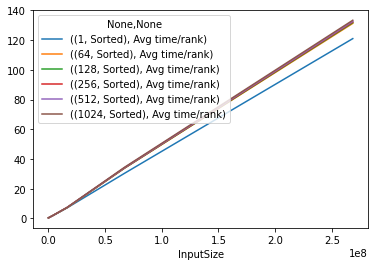

In [20]:
ctk.dataframe[[col for col in ctk.dataframe.columns if col[0][1] == "Sorted" and col[1] == "Avg time/rank"]].loc["main"].plot()

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [21]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [22]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [23]:
ctk.dataframe.loc["main"]

(1, 1%perturbed)                     (1, Random)                    \
             Avg time/rank Avg GPU time/rank Avg time/rank Avg GPU time/rank   
InputSize                                                                      
65536             0.378157          0.027361      0.372899          0.025175   
262144            0.478497          0.092686      0.491468          0.101301   
1048576           0.826881          0.293994      0.825706          0.300250   
4194304           2.345681          1.133077      2.294955          1.149923   
16777216          8.732770          4.700564      8.446711          4.698377   
67108864         33.747818         17.817201     33.503196         18.490491   
268435456       133.078179         67.250080    134.906350         73.730595   

          (1, ReverseSorted)                     (1, Sorted)  \
               Avg time/rank Avg GPU time/rank Avg time/rank   
InputSize                                                      
65536               0.368774          0.023098      0.359153   
262144              0.868809          0.101296      0.450467   
1048576             0.757554          0.258899      0.770996   
4194304             2.090415          1.044742      1.974238   
16777216            7.409880          4.054921      7.228526   
67108864           29.446331         16.191751     30.350410   
268435456         119.735836         64.562898    121.016660   

                            (64, 1%perturbed)                    (64, Random)  \
          Avg GPU time/rank     Avg time/rank Avg GPU time/rank Avg time/rank   
InputSize                                                                       
65536              0.018819          0.377721          0.027169      0.358208   
262144             0.077390          0.516136          0.120550      0.488320   
1048576            0.250543          0.959549          0.409703      0.909412   
4194304            0.937267          2.647307          1.439852      2.679765   
16777216           3.918603         10.268859          6.236516     10.275791   
67108864          17.319576         40.378846         24.462113     40.867965   
268435456         66.739332        152.295946         86.220570    164.569522   

                            (64, ReverseSorted)                    \
          Avg GPU time/rank       Avg time/rank Avg GPU time/rank   
InputSize                                                           
65536              0.028631            0.372374          0.021295   
262144             0.114436            0.439615          0.076213   
1048576            0.372954            0.761739          0.263377   
4194304            1.537970            2.134558          1.084928   
16777216           6.530366            7.650283          4.279174   
67108864          25.843745           30.469848         17.030140   
268435456        103.344016          123.132390         67.769568   

           (64, Sorted)                   (128, 1%perturbed)  \
          Avg time/rank Avg GPU time/rank      Avg time/rank   
InputSize                                                      
65536          0.352285          0.019632           0.371317   
262144         0.448827          0.077184           0.502896   
1048576        0.786690          0.290583           0.907293   
4194304        2.022278          0.988135           2.631555   
16777216       7.382933          4.078357          10.602941   
67108864      33.861092         20.830808          40.293705   
268435456    131.262319         76.972167         152.353124   

                            (128, Random)                    \
          Avg GPU time/rank Avg time/rank Avg GPU time/rank   
InputSize                                                     
65536              0.027218      0.387106          0.035977   
262144             0.109254      0.497637          0.111260   
1048576            0.360931      0.891443          0.367659   
4194304            1.418530      2.665761      

/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


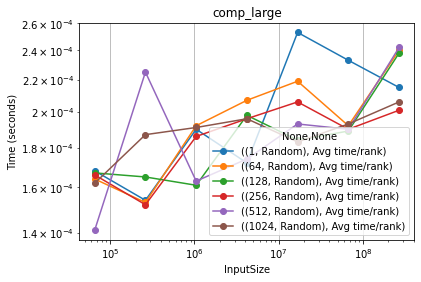

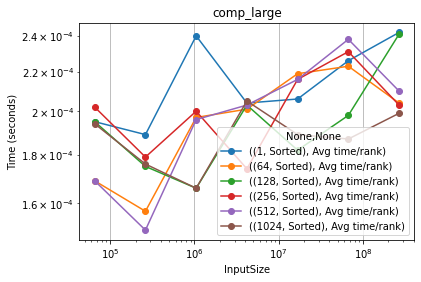

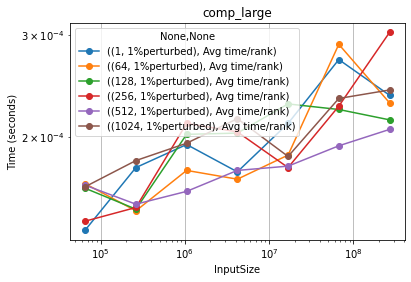

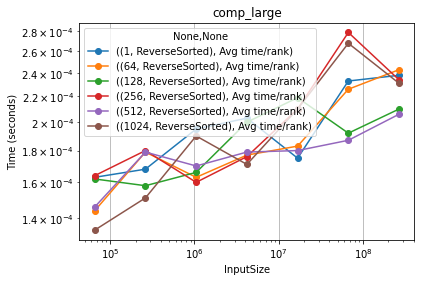

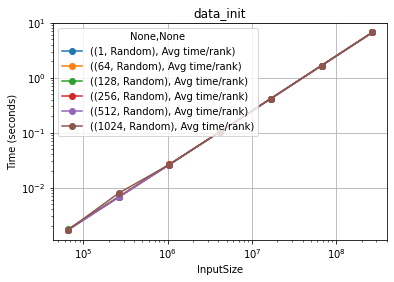

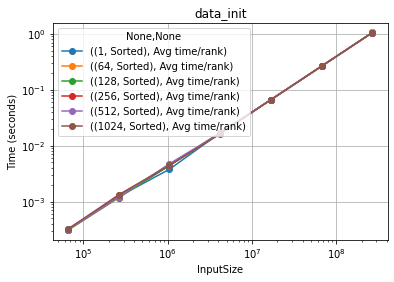

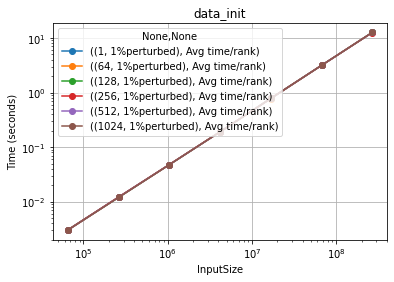

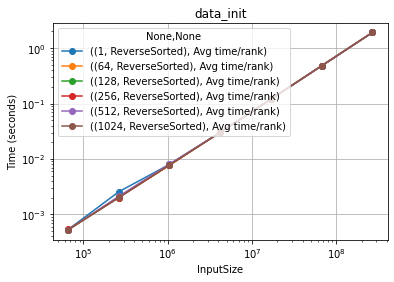

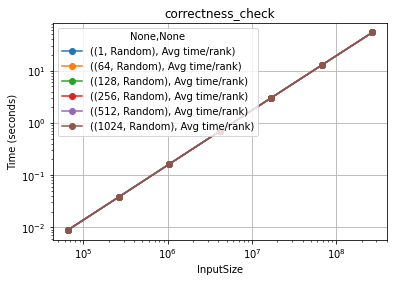

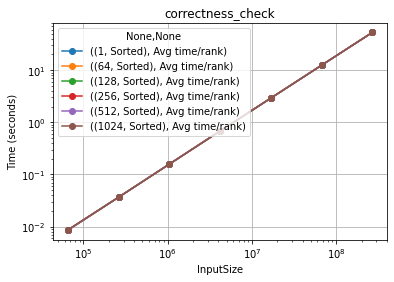

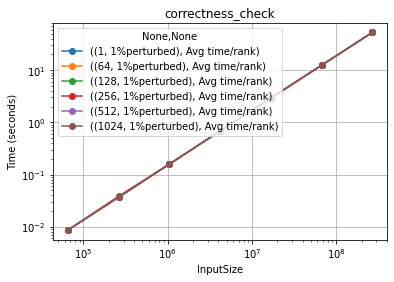

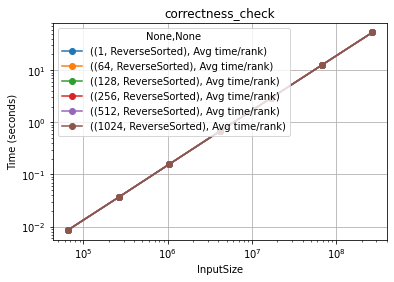

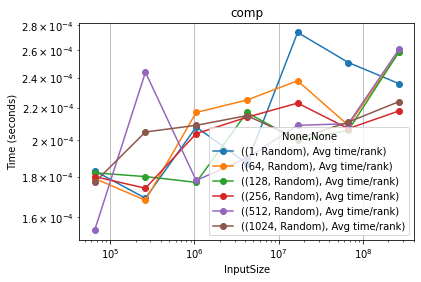

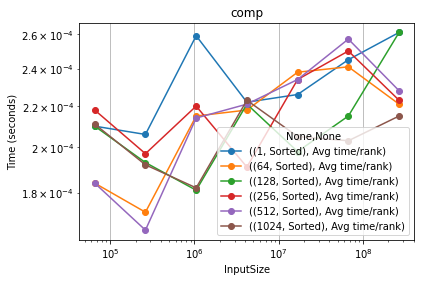

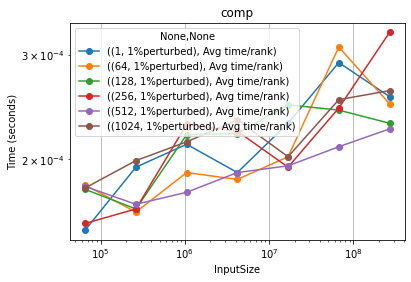

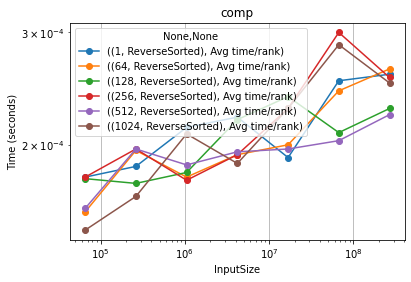

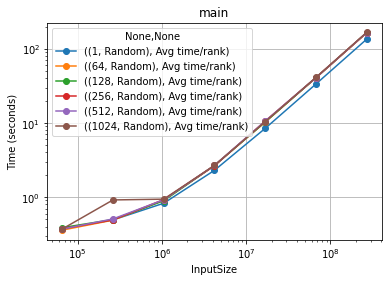

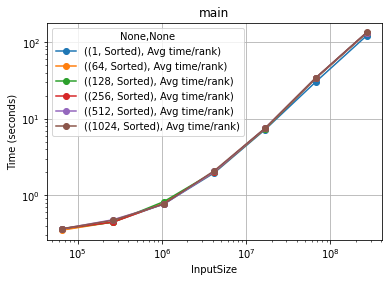

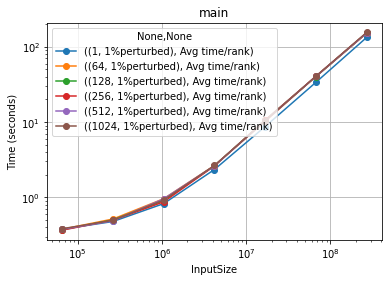

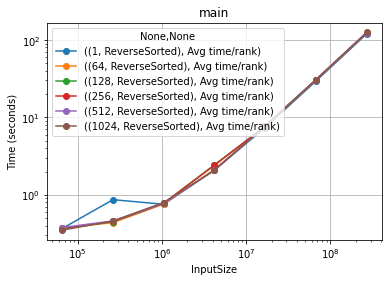

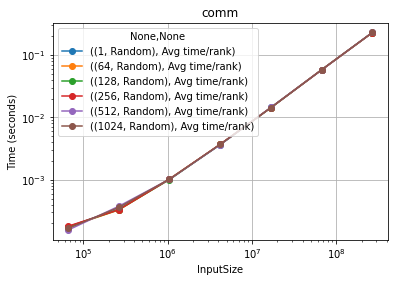

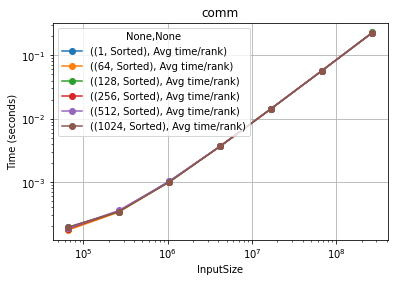

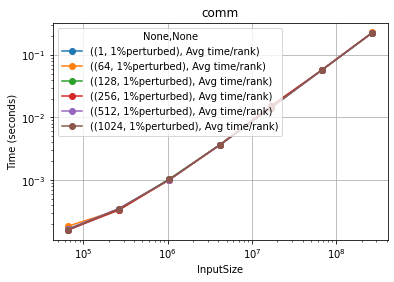

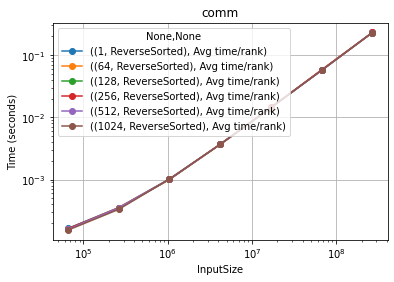

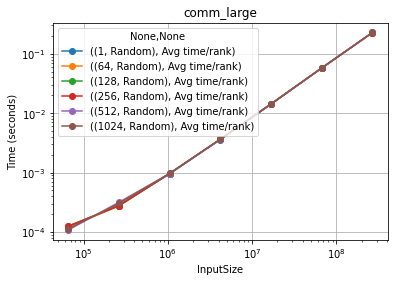

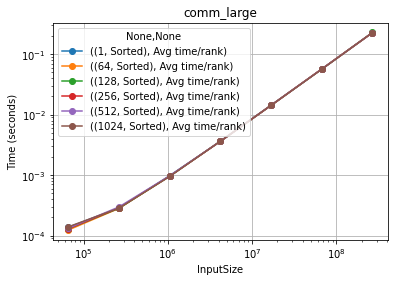

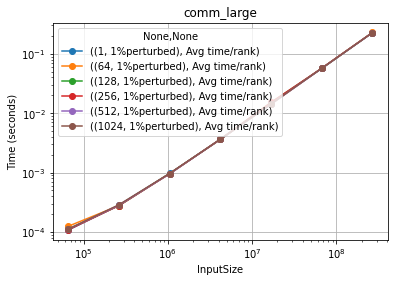

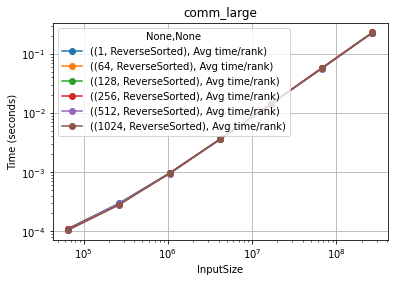

In [24]:
for name in function_names:
    for InputType in InputTypes:
        plot_pandas(
            df=ctk.dataframe[[col for col in ctk.dataframe.columns if col[0][1] == InputType and col[1] == "Avg time/rank"]].loc[name],
            title=name,
            xlabel="InputSize",
            ylabel="Time (seconds)",
            loglog=True
        )

/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


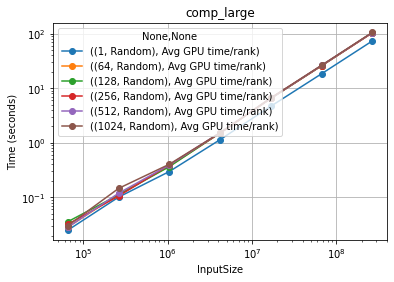

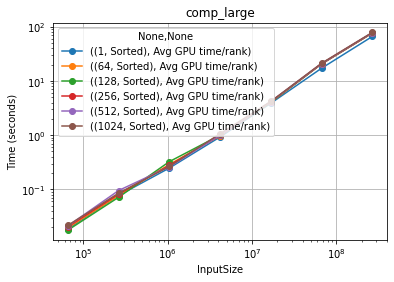

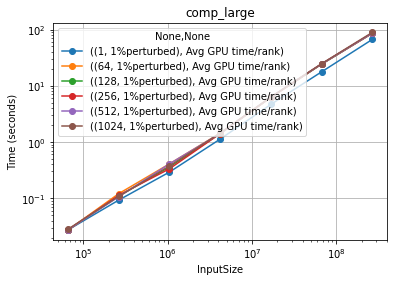

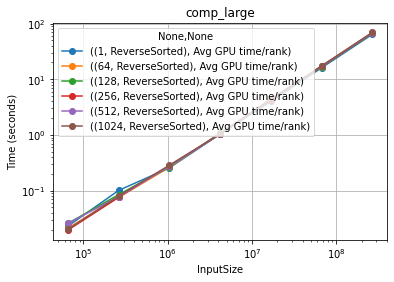

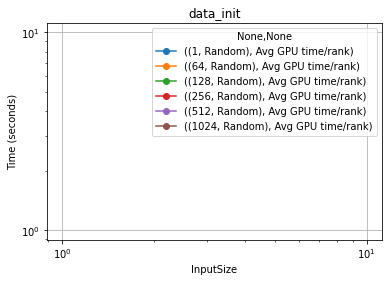

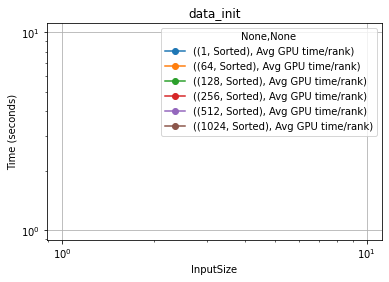

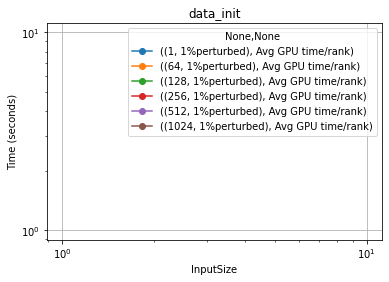

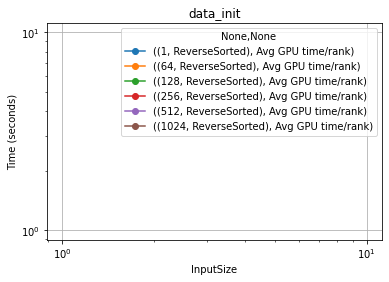

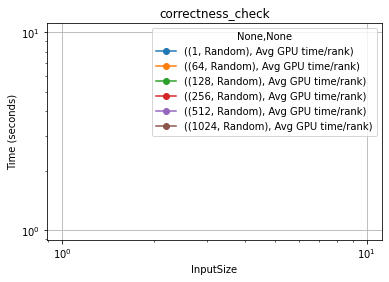

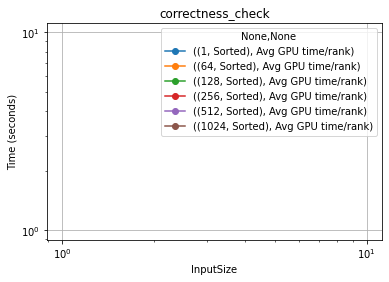

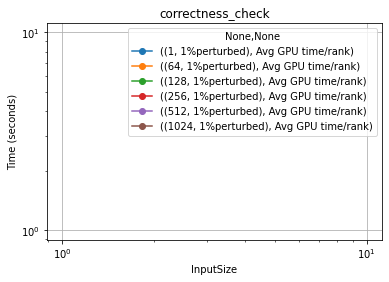

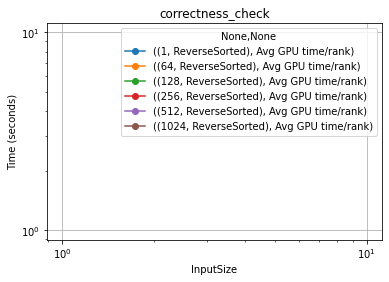

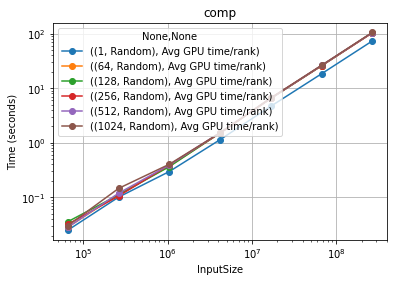

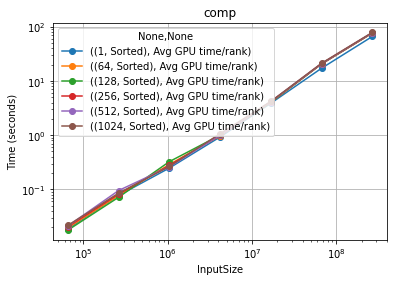

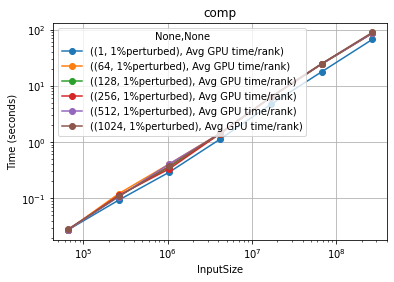

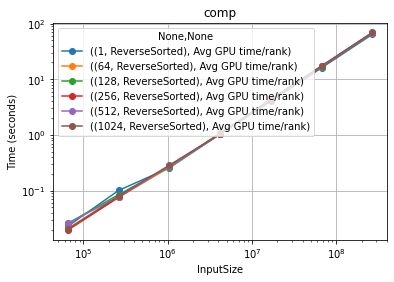

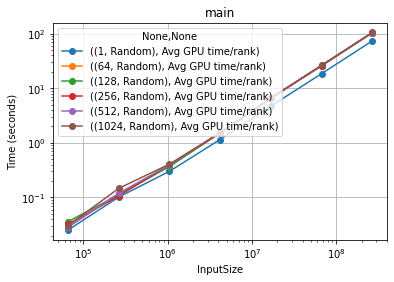

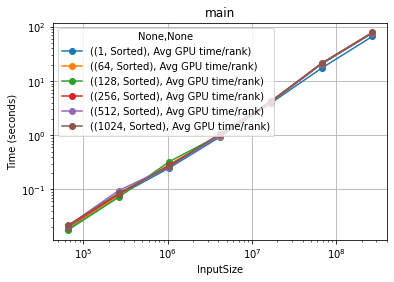

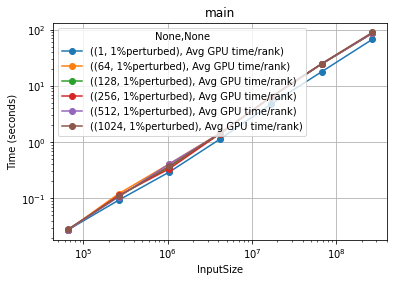

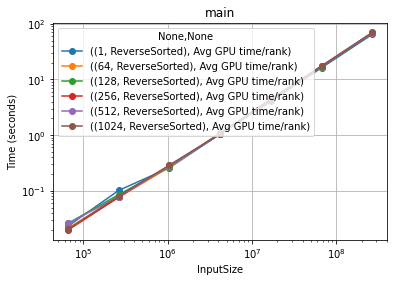

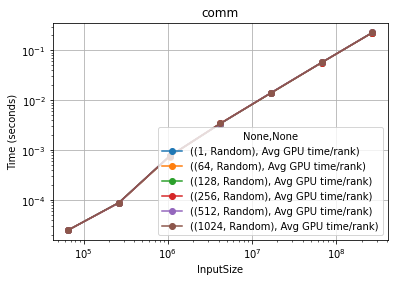

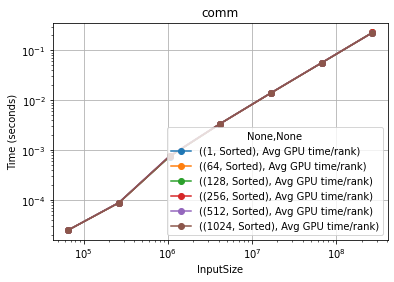

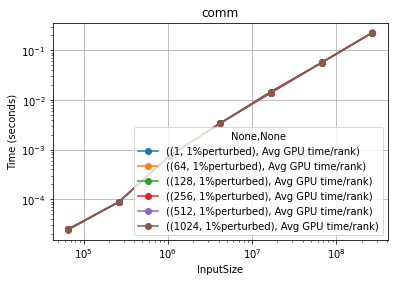

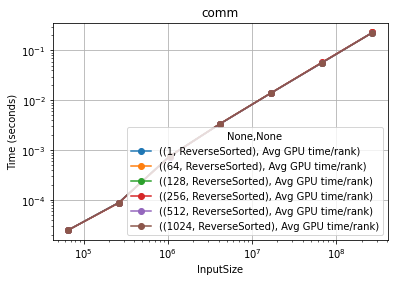

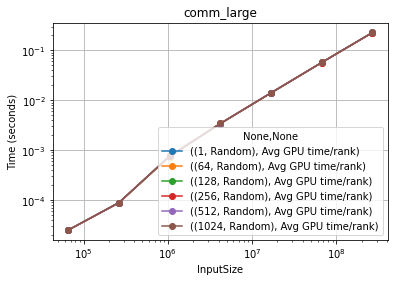

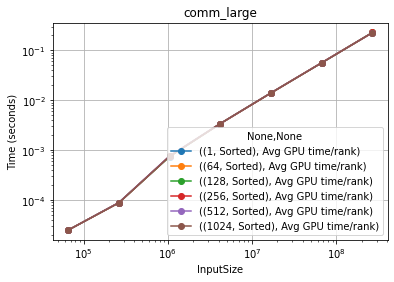

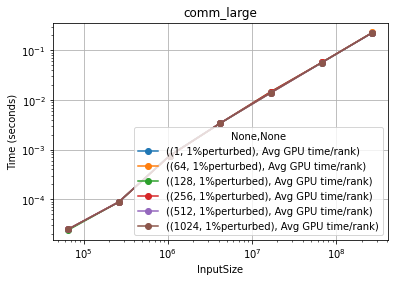

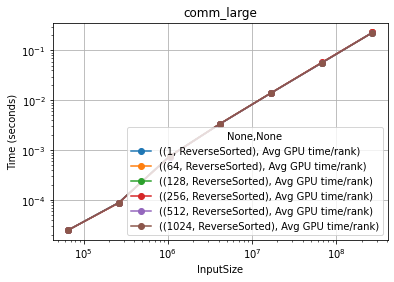

In [25]:
for name in function_names:
    for InputType in InputTypes:
        plot_pandas(
            df=ctk.dataframe[[col for col in ctk.dataframe.columns if col[0][1] == InputType and col[1] == "Avg GPU time/rank"]].loc[name],
            title=name,
            xlabel="InputSize",
            ylabel="Time (seconds)",
            loglog=True
        )